In [1]:
import sys, os, glob
sys.path.append('/home/gddaslab/mxp140/tcr_project_ultimate')
from constants import patient_names
from pdf import pdf as pdf

In [2]:
import starbars
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import matplotlib.ticker as ticker

In [3]:
pooled_data_filename = "/home/gddaslab/mxp140/tcr_project_ultimate/data/BrMET_and_GBM_data-PANPEP.csv"
find_regionwise_data_filename_in = "/home/gddaslab/mxp140/tcr_project_ultimate/data/glioblastoma_data/PANPEP"

asterisk = '\u2217'
p_value_stars = {0.001: f'{asterisk}{asterisk}{asterisk}', 0.01: f'{asterisk}{asterisk}', 0.05: f'{asterisk}'}
def get_asterisks(p_value):
    for threshold in sorted(p_value_stars.keys()):
        if p_value < threshold:
            return p_value_stars[threshold]
    return 'ns'

1.577503559206753e-09
[0, 0, 1, 1] [3218.5, 5718.5, 5718.5, 3218.5]


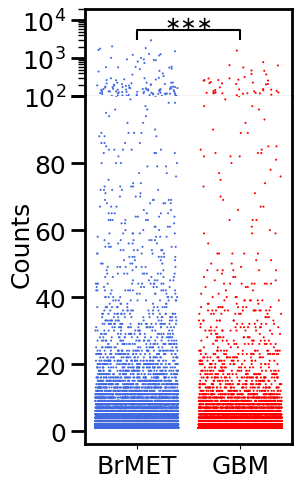

In [ ]:
def fig1a_left():
    resulting_df = pd.DataFrame(columns=['patient', 'counts'])
    for patient_id in patient_names:
        filepath_format = os.path.join(find_regionwise_data_filename_in, patient_id, f"{patient_id}_region*.csv")
        full_filepath = glob.glob(filepath_format)
        sorted_by_region_full_filepath = sorted(full_filepath, key=lambda x: int(x.split("region")[1].split(".")[0]))
        for file in sorted_by_region_full_filepath:
            df = pd.read_csv(file, sep=',')
            # print(df.columns)
            sub_result_df = pd.DataFrame({'patient': 'BrMET' if 'BrMET' in patient_id else 'GBM', 'counts':df['counts'].values})
            resulting_df = pd.concat([resulting_df, sub_result_df], ignore_index=True)
    p_value = ttest_ind(resulting_df[resulting_df['patient']=='BrMET']['counts'].astype(float), resulting_df[resulting_df['patient']=='GBM']['counts'].astype(float), equal_var=False).pvalue
    print(p_value)
    # Create a figure with two rows and one column
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3, 5), gridspec_kw={'hspace':0, 'height_ratios': [1, 4]}, sharex=True)
    
    resulting_df.to_csv('a.csv', sep=',', index=False)
    threshold = 100
    lower_data = resulting_df[resulting_df['counts']<=threshold]
    upper_data = resulting_df[resulting_df['counts']>threshold]
    
    sns.stripplot(
        data=upper_data,
        x="patient",
        y='counts',
        hue="patient",
        palette={'BrMET': 'royalblue', 'GBM': 'red'},
        alpha=1.,
        ax=axes[0],
        legend=False,
        dodge=False,
        size=1.5,
        jitter=0.4,
    )
    axes[0].set_yscale('log')
    axes[0].grid(False)
    axes[0].set_ylim(bottom=100, top=20000)
    # Add a whisker type of line connecting ticks BrMET to GBM with 4 stars on top of it
    x1, x2 = 0, 1  # BrMET and GBM positions on x-axis
    y, h, col = upper_data['counts'].max() * 1.5, 2500, 'k'  # y position of the line and stars
    # print([x1, x1, x2, x2], [y - h / 2, y + h / 2, y + h / 2, y - h / 2])
    axes[0].plot([x1, x1, x2, x2], [y - h / 2, y + h / 2, y + h / 2, y - h / 2], lw=1.5, c=col)
    axes[0].text((x1 + x2) * .5, y + h * 0.1, f'{get_asterisks(p_value)}', ha='center', va='bottom', color=col, fontsize=14)
    
    # Plot the strip plot for higher counts
    sns.stripplot(
        data=lower_data,
        x="patient",
        y='counts',
        hue="patient",
        palette={'BrMET': 'royalblue', 'GBM': 'red'},
        alpha=1.0,
        ax=axes[1],
        legend=False,
        dodge=False,
        size=1.5,
        jitter=0.4,
    )
    axes[1].set_ylim(top=100)
    #hide 100 from lower plot
    axes[1].get_yticklabels()[-1].set_visible(False)
    axes[1].grid(False)
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['top'].set_linewidth(0)
    axes[1].set_xticks([0, 1])
    axes[1].tick_params(axis="y", which="major", direction="in", length=10, width=2, labelsize=18)
    for i, ax in enumerate(axes):
        ax.tick_params(axis="y", which="major", direction="out", length=10, width=2, labelsize=18)
        ax.tick_params(axis="y", which="minor", direction="out", length=5, width=2, labelsize=18)
        ax.spines['left'].set_linewidth(2)
        ax.spines['right'].set_linewidth(2)
        if i == 0:
            ax.spines['top'].set_linewidth(2)
            ax.tick_params(axis="y", which="minor", direction="out", length=5, width=1.0, labelsize=18)
        else:
            ax.spines['bottom'].set_linewidth(2)
            ax.tick_params(axis='x', labelsize=18)
            
        ax.yaxis.label.set_visible(False)
        ax.yaxis.label.set_visible(False)
        ax.xaxis.label.set_visible(False)
    # Add a y-axis label to the whole figure
    fig.text(0.01, 0.5, 'Counts', va='center', rotation='vertical', fontsize=18)   
    plt.tight_layout()
    plt.savefig('fig1a_left.png', format='png', bbox_inches='tight', dpi=320)
    plt.show()
fig1a_left()

1.577503559206753e-09
7.887517796033765e-10


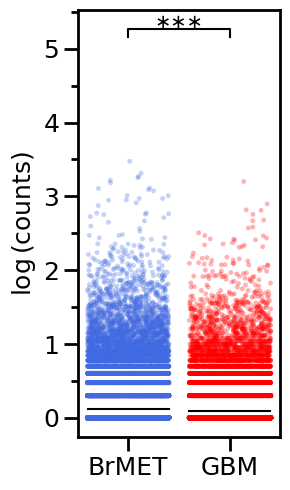

In [4]:
def fig1a_left():
    resulting_df = pd.DataFrame(columns=['patient', 'counts'])
    for patient_id in patient_names:
        filepath_format = os.path.join(find_regionwise_data_filename_in, patient_id, f"{patient_id}_region*.csv")
        full_filepath = glob.glob(filepath_format)
        sorted_by_region_full_filepath = sorted(full_filepath, key=lambda x: int(x.split("region")[1].split(".")[0]))
        for file in sorted_by_region_full_filepath:
            df = pd.read_csv(file, sep=',')
            # print(df.columns)
            sub_result_df = pd.DataFrame({'patient': 'BrMET' if 'BrMET' in patient_id else 'GBM', 'counts':df['counts'].values})
            resulting_df = pd.concat([resulting_df, sub_result_df], ignore_index=True)
    p_value = ttest_ind(resulting_df[resulting_df['patient']=='BrMET']['counts'].astype(float), resulting_df[resulting_df['patient']=='GBM']['counts'].astype(float), equal_var=False).pvalue
    print(p_value)
    print(ttest_ind(resulting_df[resulting_df['patient']=='BrMET']['counts'].astype(float), resulting_df[resulting_df['patient']=='GBM']['counts'].astype(float), equal_var=False, alternative='greater').pvalue)
    # Create a figure with two rows and one column
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 5))
    
    resulting_df['log_counts'] = np.log10(resulting_df['counts'].astype(float))
    
    sns.stripplot(
        data=resulting_df,
        x="patient",
        y='log_counts',
        hue="patient",
        palette={'BrMET': 'royalblue', 'GBM': 'red'},
        marker='o',
        alpha=0.3,
        ax=ax,
        legend=False,
        dodge=False,
        size=3.5,
        jitter=0.4,
    )
    mean_values = resulting_df.groupby('patient')['log_counts'].mean()
    for patient, mean_value in mean_values.items():
        # print(patient, mean_value)
        xmin = 0.05 if patient == 'BrMET' else 0.55
        xmax = 0.45 if patient == 'BrMET' else 0.95
        ax.axhline(mean_value, color='black', linestyle='-', xmin=xmin, xmax=xmax)
    
    # # adding statistical annotation
    # annotations = [("BrMET", "GBM", p_value)]
    # starbars.draw_annotation(annotations, fontsize=14)
    
    x1, x2 = 0, 1  # BrMET and GBM positions on x-axis
    y, h, col = resulting_df['log_counts'].max() * 1.5, 0.1, 'k'  # y position of the line and stars
    ax.plot([x1, x1, x2, x2], [y - h / 2, y + h / 2, y + h / 2, y - h / 2], lw=1.5, c=col)
    ax.text((x1 + x2) * .5, y + h * 0.1, f'{get_asterisks(p_value)}', ha='center', va='bottom', color=col, fontsize=14)
    
    ax.legend('', frameon=False)
    ax.grid(False)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.tick_params(axis="x", which="major", direction="out", length=10, width=2, labelsize=18)
    ax.tick_params(axis="x", which="minor", direction="out", length=5, width=1.0, labelsize=18)
    ax.tick_params(axis="y", which="major", direction="out", length=10, width=2, labelsize=18)
    ax.tick_params(axis="y", which="minor", direction="out", length=5, width=2, labelsize=18)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    ax.set_xlabel('')
    ax.set_ylabel(r'$\log$(counts)', fontsize=18)
    
    plt.tight_layout()
    # plt.savefig('fig1a_left.png', format='png', bbox_inches='tight', dpi=320)
    plt.show()
    return resulting_df
a = fig1a_left()

In [15]:
brmet = a[a['patient']=='BrMET']
gbm = a[a['patient']=='GBM']

In [46]:
gbm['counts'].mean()

np.float64(1.8148645623460935)

In [36]:
(brmet[brmet['counts']>100]['counts'].sum()/brmet['counts'].sum())*100

22.000917713380964

In [37]:
(gbm[gbm['counts']>100]['counts'].sum()/gbm['counts'].sum())*100

11.905191145353967

In [43]:
(brmet[brmet['counts']>100]['counts'].nunique()/brmet['counts'].nunique())*100

50.520833333333336

In [44]:
(gbm[gbm['counts']>100]['counts'].nunique()/gbm['counts'].nunique())*100

34.4

/tmp/ipykernel_55855/825981365.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


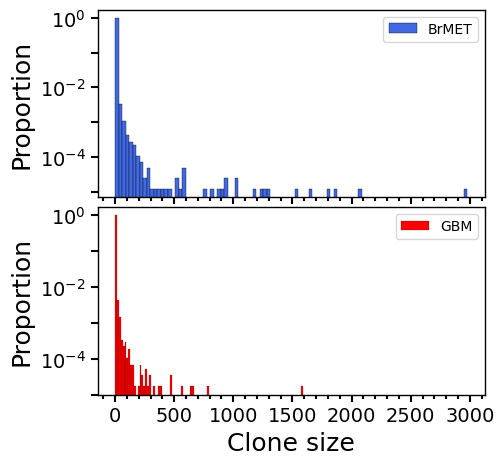

In [5]:
def fig1a_right():
    brmet_clones = []
    gbm_clones = []
    for patient_id in patient_names:
        filepath_format = os.path.join(find_regionwise_data_filename_in, patient_id, f"{patient_id}_region*.csv")
        full_filepath = glob.glob(filepath_format)
        sorted_by_region_full_filepath = sorted(full_filepath, key=lambda x: int(x.split("region")[1].split(".")[0]))
        for file in sorted_by_region_full_filepath:
            df = pd.read_csv(file, sep=',')
            # print(df.columns)
            clone_sizes = df['counts'].values
            if 'BrMET' in patient_id:
                brmet_clones.append(clone_sizes)
            else:
                gbm_clones.append(clone_sizes)
    # print(brmet_clones)
    # print(gbm_clones)
    
    brmet_clones = np.concatenate(brmet_clones)
    gbm_clones = np.concatenate(gbm_clones)
    
    # Create a figure with two rows and one column
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5, 5), gridspec_kw={'wspace':0, 'hspace':0.05}, sharex=True)

    # Plotting histograms of aa and bb on the axes
    sns.histplot(brmet_clones, bins=100, stat='probability', color='royalblue', alpha=1.0, label='BrMET', ax=ax1)
    sns.histplot(gbm_clones, bins=100, stat='probability', color='red', alpha=1.0, label='GBM', ax=ax2)

    for ax in [ax1, ax2]:
        ax.set_yscale('log')
        minor_ticks_on_y_axis = [10**(-1), 10**(-3), 10**(-5)]
        ax.set_yticks(minor_ticks_on_y_axis, minor=True)
        ax.yaxis.set_minor_formatter(ticker.NullFormatter())
        # ax.xaxis.set_major_locator(ticker.MultipleLocator(1000 if ax==ax1 else 500))
        # ax.xaxis.set_minor_locator(ticker.MultipleLocator(200 if ax==ax1 else 100))
        ax.tick_params(axis='both', which='both', width=1.5)
        for spine in ax.spines.values():
            spine.set_linewidth(1.)
        ax.legend(loc='upper right')
        if ax==ax2:
            ax.set_xlabel('Clone size', fontsize=18)
            ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
            ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
        ax.set_ylabel('Proportion', fontsize=18)
        ax.tick_params(axis='both', which='major', labelsize=14, length=5)
        ax.tick_params(axis='y', which='minor', labelsize=14, length=5)
        ax.tick_params(axis='x', which='minor', labelsize=14, length=3)
        ax.grid(False)
    # Display the plot
    plt.tight_layout()
    plt.savefig('fig1a_right.png', format='png', bbox_inches='tight', dpi=320)
    plt.show()
    
fig1a_right()

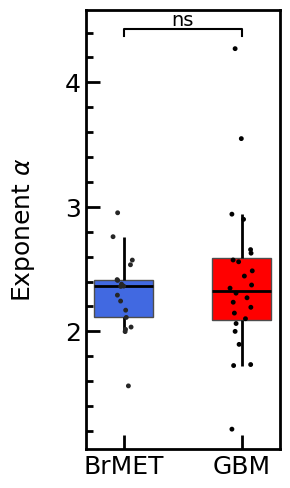

In [47]:
def fig1c():
    df = pd.read_excel('/home/gddaslab/mxp140/tcr_project_ultimate/results/results.xlsx', engine='openpyxl', sheet_name='exponents')
    df = df[~df['Region'].str.contains('combined')]
    df = df.dropna(axis=0)
    df = df[~((df['Patient'] == 'BrMET025') | (df['Region'] == 3))] # Drop BrMET025 region3
    df = df[~((df['Patient'] == 'BrMET028') | (df['Region'] == 2))] # Drop BrMET028 region2
    df = df[~((df['Patient'] == 'GBM062') | (df['Region'] == 2))] # Drop GBM062 region2
    df = df[~((df['Patient'] == 'GBM063') | (df['Region'] == 2))] # Drop GBM063 region3
    df['GBM'] = df['Patient'].str.contains('GBM')
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 5))
    sns.boxplot(
        data=df,
        x="GBM",
        y='alpha',
        hue="GBM",
        palette={False: 'royalblue', True: 'red'},
        ax=ax,
        medianprops={"color": "black", "linewidth": 2},
        whiskerprops={"color": "black", "linewidth": 2},
        width = 0.5,
        capprops={"color":"none"},
        showfliers=False,
        legend=False,
        fill=True,
        dodge=False,
        saturation=1.0
        )
    sns.stripplot(
        data=df,
        x="GBM",
        y='alpha',
        hue="GBM",
        color='black',
        palette='dark:black',
        alpha=1.0,
        ax=ax,
        size=3.5,
        legend=False,
        dodge=False,
    )
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["BrMET", "GBM"])
    ax.set_xlabel("")
    ax.set_ylabel(r"Exponent $\alpha$", fontsize=18)
    
    # Increase font size for tick labels
    xtick_labels, ytick_labels = ax.get_xticklabels(), ax.get_yticklabels()
    for label in xtick_labels + ytick_labels:
        label.set_fontsize(24)
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
    ax.tick_params(
        axis="x", which="major", direction="in", length=10, width=2, labelsize=18
    )
    ax.tick_params(
        axis="x", which="minor", direction="in", length=5, width=2, labelsize=18
    )
    ax.tick_params(
        axis="y", which="major", direction="in", length=10, width=2, labelsize=18
    )
    ax.tick_params(
        axis="y", which="minor", direction="in", length=5, width=2, labelsize=18
    )
    
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    
    ax.yaxis.labelpad = 20
    ax.xaxis.labelpad = 20
    
    p_value = ttest_ind(df[df['GBM']==False]['alpha'].values, df[df['GBM']==True]['alpha'].values, equal_var=False).pvalue
    x1 = 0
    x2 = 1
    y = 4.4
    h = 0.05
    ax.plot([x1, x1, x2, x2], [y - h / 2, y + h / 2, y + h / 2, y - h / 2], lw=1.5, c='black')
    ax.text((x1 + x2) * .5, y + h * 0.5, f'{get_asterisks(p_value)}', ha='center', va='bottom', color='black', fontsize=14)
    
    plt.tight_layout()
    plt.grid(False)
    # plt.savefig('fig1c.png', format='png', bbox_inches='tight', dpi=320)
    plt.show()
    return df
a = fig1c()

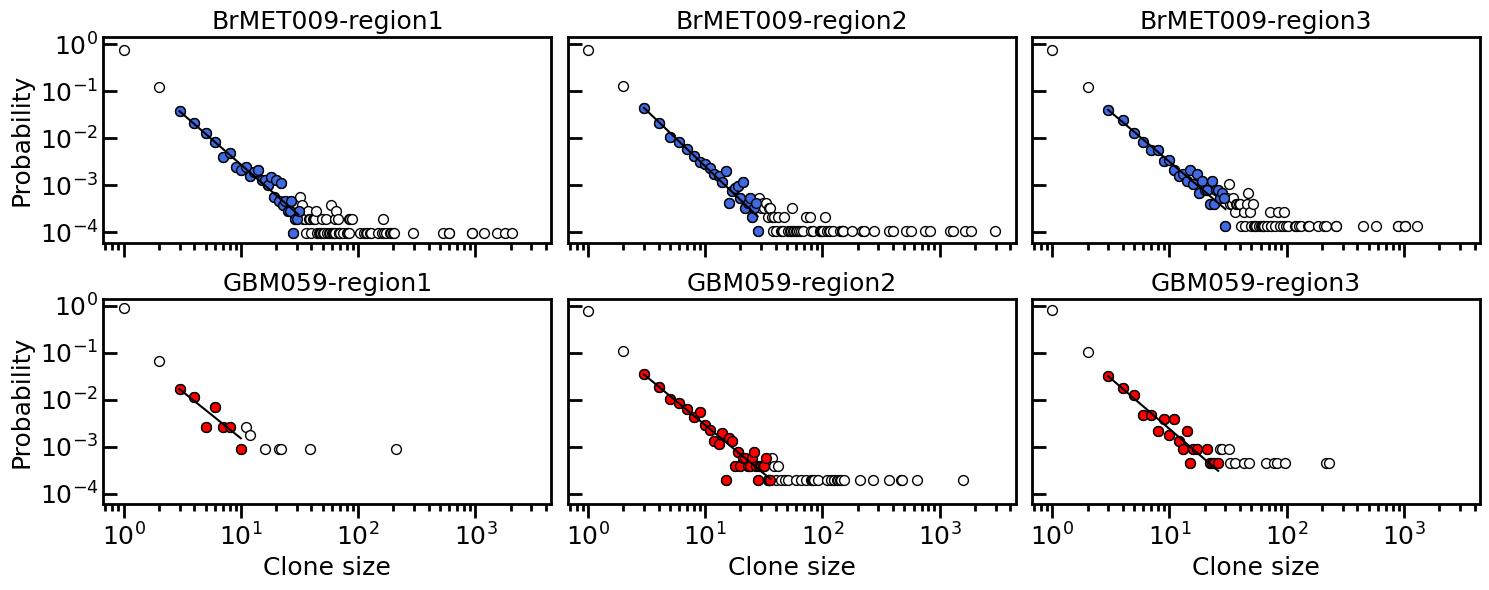

In [7]:
def fig1b():
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6), sharex=True, sharey=True)
    
    for j, patient_id in enumerate(['BrMET009', 'GBM059']):
        filepath_format = os.path.join(find_regionwise_data_filename_in, patient_id, f"{patient_id}_region*.csv")
        full_filepath = glob.glob(filepath_format)
        sorted_by_region_full_filepath = sorted(full_filepath, key=lambda x: int(x.split("region")[1].split(".")[0]))
        
        exp_df = pd.read_excel('/home/gddaslab/mxp140/tcr_project_ultimate/results/results.xlsx', engine='openpyxl', sheet_name='exponents')
        exp_df = exp_df[~exp_df['Region'].str.contains('combined')]
        exp_df = exp_df.dropna(axis=0)
        exp_df = exp_df[exp_df['Patient']==patient_id]
        # print(exp_df)   
        
        for i, file in enumerate(sorted_by_region_full_filepath):
            df = pd.read_csv(file, sep=',')
            clone_sizes = df['counts'].values
            x, y = pdf(clone_sizes)
            data = pd.DataFrame({'x':x, 'y':y})
            axes[j][i].scatter(x,
                            y,
                            s = 50,#100*y,
                            facecolors='white', 
                            edgecolors="black")
            
            xmin = exp_df[(exp_df['Region']==f'region{i+1}')]['xmin'].values[0]
            xmax = exp_df[(exp_df['Region']==f'region{i+1}')]['xmax'].values[0]
            alpha = exp_df[(exp_df['Region']==f'region{i+1}')]['alpha'].values[0]
            amplitude = data[data['x']==xmin]['y'].values[0]
            fitted_x_data = data[(data['x']>=xmin)&(data['x']<=xmax)]['x'].values
            fitted_y_data = data[(data['x']>=xmin)&(data['x']<=xmax)]['y'].values
            predicted_y_data = amplitude * (fitted_x_data/xmin)**(-alpha)
            axes[j][i].scatter(fitted_x_data, fitted_y_data, s=50, facecolors="royalblue" if 'BrMET' in patient_id else 'red', edgecolors="black", label="fitted", zorder=1, alpha=1.0)
            axes[j][i].plot(fitted_x_data, predicted_y_data, linewidth=1.5, color='black', label=r'best fit')
            axes[j][i].set_xscale('log')
            axes[j][i].set_yscale('log')
            axes[j][i].grid(False)
            axes[j][i].tick_params(axis="x", which="major", direction="out", length=10, width=2, labelsize=18)
            axes[j][i].tick_params(axis="x", which="minor", direction="out", length=5, width=2, labelsize=18)
            axes[j][i].tick_params(axis="y", which="major", direction="in", length=10, width=2, labelsize=18)
            axes[j][i].tick_params(axis="y", which="minor", direction="in", length=5, width=2, labelsize=18)
            axes[j][i].set_xlabel('Clone size' if j==1 else '', fontsize=18)
            axes[j][i].set_ylabel('Probability' if i==0 else '', fontsize=18)
            axes[j][i].set_title(f'{patient_id}-region{i+1}', fontsize=18)
            axes[j][i].yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
            for spine in axes[j][i].spines.values():
                spine.set_linewidth(2)
            # ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
        plt.subplots_adjust(wspace=0)  # Set the width space to 0 to remove gaps
        plt.tight_layout()
    plt.savefig(f'fig1b.png', format='png', bbox_inches='tight', dpi=320)
    plt.show()

fig1b()